In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st
import numpy as np

In [2]:
path = "../data/raw/superstore.csv"

In [3]:
df = pd.read_csv(path, encoding='latin1')

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

fine, there is no NaN.
let's start

# ClEANING

1. formating date columns

In [6]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=False)
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=False)

2. creating price column of the product

In [7]:
df["Price"] = df["Sales"] / df["Quantity"]

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840


3. deleting duplicates

In [9]:
df = df.drop_duplicates()

# ANALYS

lets check sales for every month

<Axes: xlabel='month'>

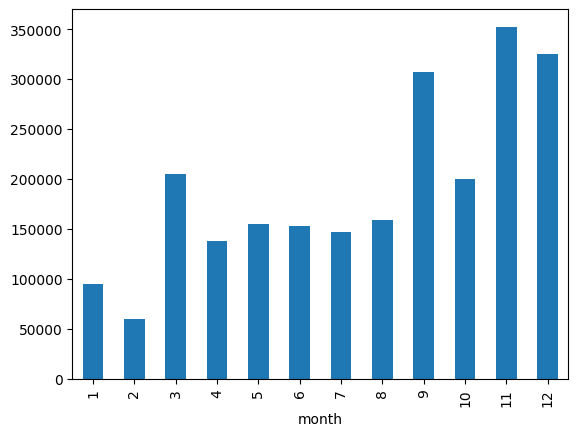

In [10]:
df['month'] = df['Order Date'].dt.month
monthly_sales = df.groupby("month")['Sales'].sum()
monthly_sales.plot(kind='bar')

so we see in December we have most sales and in February least sales

i also wanna check sales for every year

<Axes: xlabel='year'>

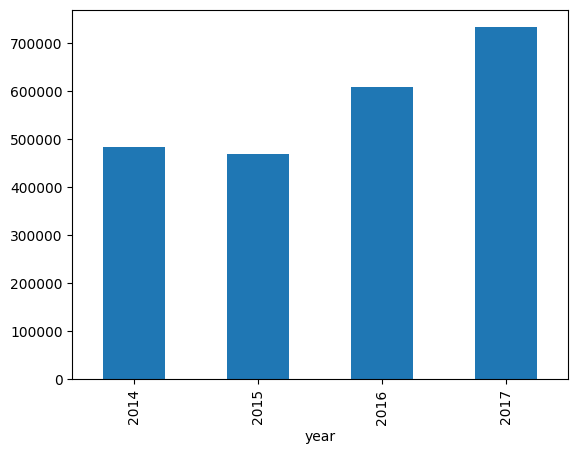

In [11]:
df["year"] = df['Order Date'].dt.year
yearly_sales = df.groupby("year")["Sales"].sum()
yearly_sales.plot(kind="bar")

very interesting (no)

lets find the most profitable category

Text(0.5, 1.0, 'Category Profit')

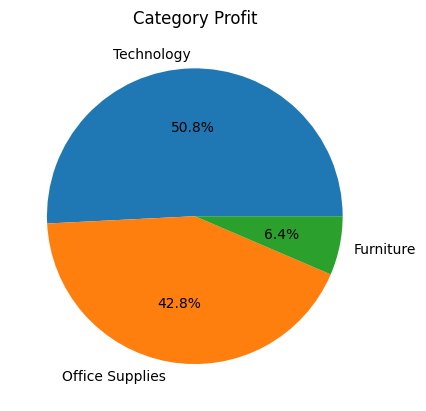

In [12]:
cats = df.groupby("Category")['Profit'].sum().sort_values(ascending=False)
fig, ax = plt.subplots()
ax.pie(cats, labels=cats.index, autopct='%1.1f%%')
ax.set_title("Category Profit")

i see that Technology is the most profitable category

what about the most popular category

Text(0.5, 1.0, 'Category Sales')

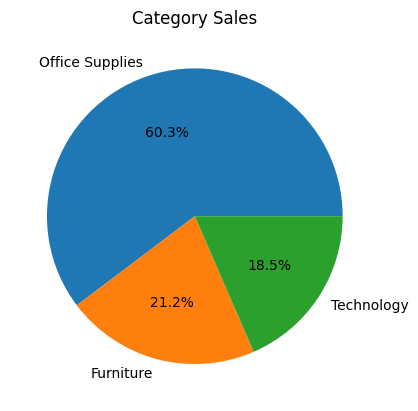

In [13]:
cats = df.groupby("Category").size().sort_values(ascending=False)
fig, ax = plt.subplots()
ax.pie(cats, labels=cats.index, autopct='%1.1f%%')
ax.set_title("Category Sales")

so the most popular is Office Supplies

i dont wanna counting other columns, so lets just move forward

# HEATMAP

we dont have hours but we have weekdays.

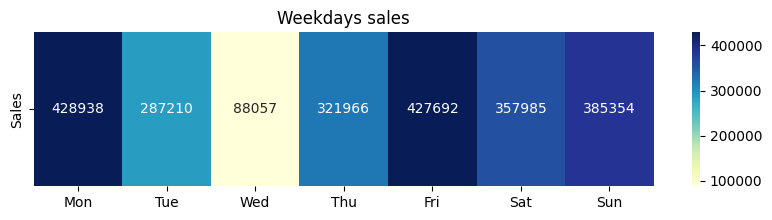

In [14]:
df['weekday'] = df['Order Date'].dt.weekday

weekday_sales = df.groupby('weekday')['Sales'].sum()
pivot = weekday_sales.to_frame().T
pivot.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 2))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Weekdays sales")
plt.show()

so what about profit?

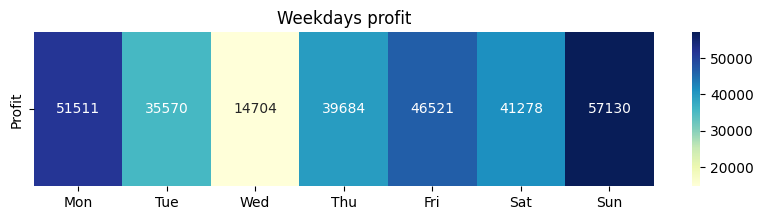

In [15]:
df['weekday'] = df['Order Date'].dt.weekday

weekday_sales = df.groupby('weekday')['Profit'].sum()
pivot = weekday_sales.to_frame().T
pivot.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 2))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Weekdays profit")
plt.show()

and what about size of the sales

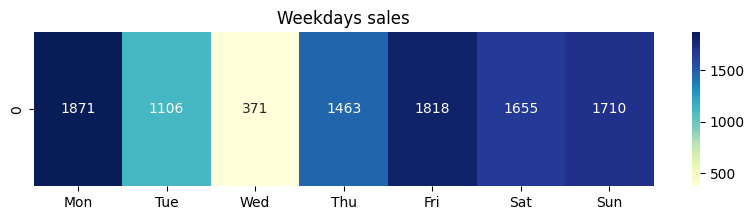

In [16]:
df['weekday'] = df['Order Date'].dt.weekday

weekday_sales = df.groupby('weekday').size()
pivot = weekday_sales.to_frame().T
pivot.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 2))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Weekdays sales")
plt.show()

# CORRELATION

1. Quantity - Discount
2. Quantity - Price
3. Discount - Profit
4. Region - Sales

i think thats enough

# Quantity - Discount

In [17]:
r = df['Quantity'].corr(df['Discount'], method="pearson")
print(r)

0.008622970271156506


oh. it can be bad and good.

# Quantity - Price

In [18]:
r = df['Price'].corr(df['Quantity'], method="pearson")
print(r)

-0.003148448771413859


# Discount - Profit

In [19]:
r = df['Discount'].corr(df['Profit'], method='pearson')
print(r)

-0.2194874563717678


This means that the smaller the discount, the greater the profit and vice versa.

# Region - Sales

In [25]:
print(df['City'].unique().shape)
print(df.shape)

(531,)
(9994, 25)


oh.. 531 cities per 10,000 records is very low. There's no correlation.

# Выводы